In [2]:
import numpy as np
import pandas as pd
import plotly.express as px

In [6]:
parent_path = r"C:\Users\Parth\Desktop\AirBnB_project\Data"

In [5]:
import os

In [7]:
data_path = os.path.join(parent_path, 'Raw', 'listings.csv')

In [8]:
df = pd.read_csv(data_path)

In [9]:
df.shape

(14861, 18)

In [11]:
df['id'].duplicated().sum()

0

In [12]:
df['name'].nunique()

5423

In [58]:
df.shape[0]

14861

In [61]:
per = (df['host_name'].nunique()/df.shape[0])*100
print(per)

22.979611062512618


In [13]:
df['host_id'].nunique()

8834

In [14]:
df['host_name'].nunique()

3415

In [15]:
# Check name, host_id and host_name

In [16]:
df['neighbourhood_group'].nunique()

0

In [17]:
df['neighbourhood_group'].isna().sum()

14861

In [18]:
# Neighbourhood is all empty need to drop it

In [19]:
df['neighbourhood'].nunique()

44

In [20]:
df['neighbourhood'].value_counts()

neighbourhood
78704    2233
78702    1784
78701    1039
78741     972
78745     753
78703     685
78705     590
78751     551
78723     493
78744     427
78758     421
78721     401
78734     351
78722     284
78752     268
78746     263
78757     260
78748     246
78727     207
78724     205
78753     198
78756     198
78729     186
78737     186
78759     179
78731     172
78754     162
78749     157
78747     128
78728     127
78725      90
78733      88
78738      82
78750      79
78732      76
78736      75
78717      68
78735      56
78730      39
78739      36
78719      20
78726      16
78742       8
78712       2
Name: count, dtype: int64

In [21]:
# More bookings more popular

In [22]:
df[['longitude','latitude']].describe()

,longitude,latitude
count,14861.000000,14861.000000
mean,-97.749786,30.281061
std,0.062634,0.065000
min,-98.053350,30.078440
25%,-97.768528,30.241870
50%,-97.740600,30.269160
75%,-97.716692,30.309070
max,-97.559300,30.518350


In [24]:
df['location'] = list(zip(df['longitude'].tolist(),df['latitude'].tolist()))

In [25]:
df['location'].value_counts(
)

location
(-97.747574150252, 30.2715984321747)        61
(-97.757196, 30.2748812)                    30
(-97.755234, 30.237497)                     23
(-97.72521, 30.32197)                       22
(-97.738831, 30.256454)                     17
                                            ..
(-97.76257, 30.23372)                        1
(-97.73708, 30.32614)                        1
(-97.98792, 30.36864)                        1
(-97.70623, 30.25638)                        1
(-97.76494041135744, 30.132159387763625)     1
Name: count, Length: 14382, dtype: int64

In [62]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [26]:
df['room_type'].nunique()

4

In [27]:
df['room_type'].value_counts()

room_type
Entire home/apt    12205
Private room        2529
Shared room          121
Hotel room             6
Name: count, dtype: int64

In [28]:
df['price'].describe()

count    14861.000000
mean       269.298769
std        549.376464
min          1.000000
25%         95.000000
50%        150.000000
75%        266.000000
max      19286.000000
Name: price, dtype: float64

<AxesSubplot: >

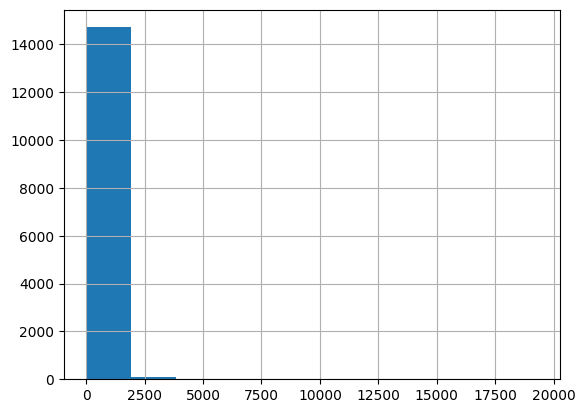

In [29]:
df['price'].hist()

In [31]:
df.loc[df['price']>=2200, 'price'].nunique()

74

In [32]:
df.loc[df['price']>=2200, 'price'].describe()

count      106.000000
mean      4737.632075
std       3563.854674
min       2202.000000
25%       2701.250000
50%       3465.000000
75%       5000.000000
max      19286.000000
Name: price, dtype: float64

In [33]:
df['minimum_nights'].nunique()

63

In [34]:
df['minimum_nights'].describe()

count    14861.000000
mean         7.629365
std         28.289063
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max       1124.000000
Name: minimum_nights, dtype: float64

In [42]:
df['minimum_nights'].quantile(0.999)

365.0

In [43]:
df[df['minimum_nights']>=365].shape

(20, 19)

In [45]:
df['number_of_reviews'].describe()

count    14861.000000
mean        37.843348
std         79.894590
min          0.000000
25%          1.000000
50%          8.000000
75%         38.000000
max       1141.000000
Name: number_of_reviews, dtype: float64

In [46]:
df['last_review'].head()

0    2023-08-27
1    2023-08-04
2    2022-10-17
3    2023-09-04
4    2023-05-16
Name: last_review, dtype: object

In [47]:
import datetime

In [48]:
df['last_review'] = pd.to_datetime(df['last_review'])

In [49]:
df['last_review'].describe()

count                            11758
mean     2022-08-20 05:31:38.894370048
min                2012-03-13 00:00:00
25%                2022-10-24 00:00:00
50%                2023-07-15 00:00:00
75%                2023-08-24 00:00:00
max                2023-09-10 00:00:00
Name: last_review, dtype: object

In [50]:
df['last_review'].value_counts()

last_review
2023-09-04    826
2023-08-27    394
2023-09-03    394
2023-08-20    339
2023-08-13    252
             ... 
2018-12-18      1
2019-03-22      1
2018-10-01      1
2019-06-06      1
2023-02-16      1
Name: count, Length: 1459, dtype: int64

In [52]:
df['reviews_per_month'].describe()

count    11758.000000
mean         1.537180
std          1.711574
min          0.010000
25%          0.260000
50%          0.990000
75%          2.260000
max         26.250000
Name: reviews_per_month, dtype: float64

In [54]:
df['calculated_host_listings_count'].describe()

count    14861.000000
mean        11.047641
std         24.472357
min          1.000000
25%          1.000000
50%          2.000000
75%          6.000000
max        136.000000
Name: calculated_host_listings_count, dtype: float64

In [63]:
df['calculated_host_listings_count']

0         1
1         1
2         1
3         1
4         1
         ..
14856     5
14857     6
14858    19
14859     1
14860     1
Name: calculated_host_listings_count, Length: 14861, dtype: int64

In [55]:
df['availability_365'].describe()

count    14861.000000
mean       152.092591
std        136.610382
min          0.000000
25%          1.000000
50%        127.000000
75%        302.000000
max        365.000000
Name: availability_365, dtype: float64

In [56]:
df['number_of_reviews_ltm'].describe()

count    14861.000000
mean        10.367674
std         17.111299
min          0.000000
25%          0.000000
50%          2.000000
75%         14.000000
max        258.000000
Name: number_of_reviews_ltm, dtype: float64

In [57]:
df['number_of_reviews_ltm'].head()

0    42
1    21
2     3
3    17
4     3
Name: number_of_reviews_ltm, dtype: int64